### Assessing suitable days: rainless days

In [1]:
import matplotlib
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline
import csv
import bisect
import datetime
from scipy import interpolate
from matplotlib.dates import DateFormatter

# User defined functions
from load_precip_irrad_from_csv import *

#### Import Precipitation

In [2]:
luz_precip = r'precipitation_luz_2017_2018.csv'

df_precip = process_LUZ_Precip(luz_precip)
df_precip.set_index(df_precip.datetime, inplace=True)
s_precip = df_precip['rka150d0']       # daily precipitaion in mm 

#df_precip.head(n=2)

#### Import sunshine duration, relative to the absolute possible daily sum

In [3]:
dur_csv = r'sunshine_duration_2017_2018.csv'

df_rel_insol = process_LUZ_dur(dur_csv)
df_rel_insol.set_index(df_rel_insol.datetime, inplace=True)
df_rel_insol['sremaxdv'] = pd.to_numeric(df_rel_insol['sremaxdv'], errors='coerce')
s_rel_insol = df_rel_insol['sremaxdv']          # in percent

#### Precipitation and overlayed insolination 2017 from 11-17 to 12-31 near Lucern at Long: 8°18' Lat: 47°02'  
Remarks: 
- Pictures from sky-cameras range from 2017 11.17 to 2018 11.13<br>
- HSLU pyranometer data is avaiable from 2017 01.01 to 2018 01.03

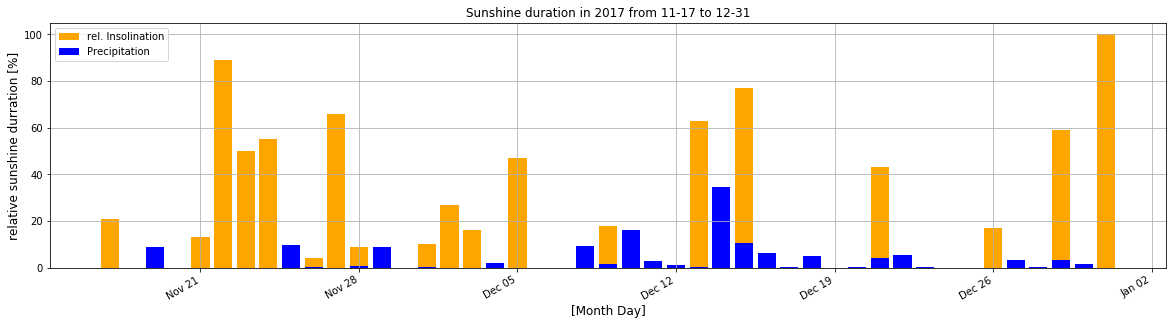

In [4]:
year  = '2017-'   
s_day = '11-17' # beginning of observation
e_day = '12-31' # end of observation
start = year + s_day
end   = year + e_day

s_precip_17 = s_precip.loc[start:end]
s_rel_insol_17 = s_rel_insol.loc[start:end]

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(s_rel_insol_17.index, s_rel_insol_17.values, label='rel. Insolination', color= 'orange')
ax.bar(s_precip_17.index, s_precip_17.values, label='Precipitation', color= 'blue')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('relative sunshine durration [%]', fontsize=12)
ax.set_title('Sunshine duration in {} from {} to {}'.format(year.strip('-'),s_day,e_day))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

#### Insolination and overlayed precipitation in 2017: 9.30 - 10.31

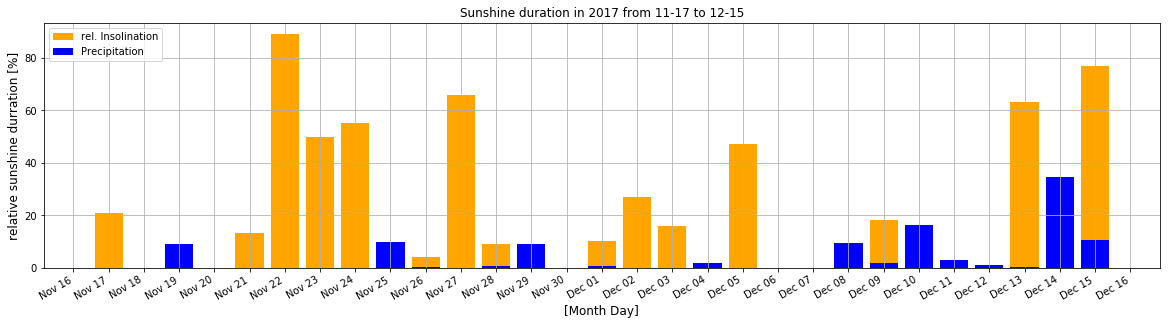

In [5]:
year  = '2017-'   
s_day = '11-17' # beginning of observation
e_day = '12-15' # end of observation
start = year + s_day
end   = year + e_day

s_precip_17 = s_precip.loc[start:end]
s_rel_insol_17 = s_rel_insol.loc[start:end]

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(s_rel_insol_17.index, s_rel_insol_17.values, label='rel. Insolination', color= 'orange')
ax.bar(s_precip_17.index, s_precip_17.values, label='Precipitation', color= 'blue')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('relative sunshine durration [%]', fontsize=12)
ax.set_title('Sunshine duration in {} from {} to {}'.format(year.strip('-'),s_day,e_day))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

#### Detail view 2018 January to March 
Remark: Time span where pyranometer data from HSLU is avaiable in 2018

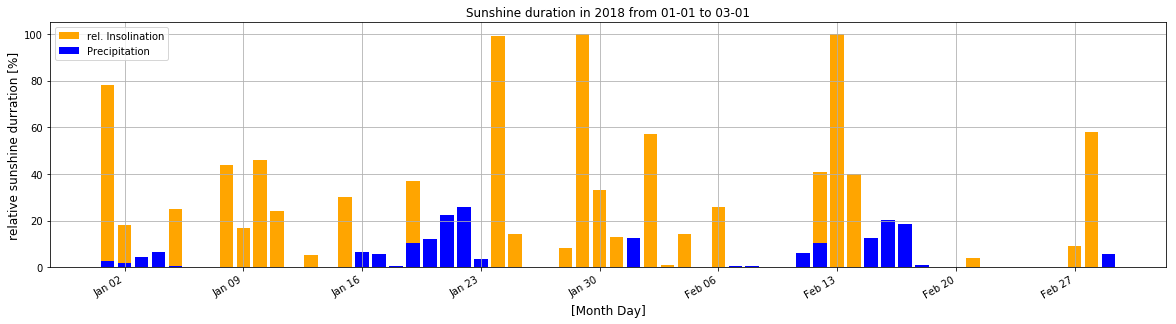

In [6]:
year  = '2018-'   
s_day = '01-01' # beginning of observation
e_day = '03-01' # end of observation
start = year + s_day
end   = year + e_day

s_precip_18 = s_precip.loc[start:end]
s_rel_insol_18 = s_rel_insol.loc[start:end]

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(s_rel_insol_18.index, s_rel_insol_18.values, label='rel. Insolination', color= 'orange')
ax.bar(s_precip_18.index, s_precip_18.values, label='Precipitation', color= 'blue')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('relative sunshine durration [%]', fontsize=12)
ax.set_title('Sunshine duration in {} from {} to {}'.format(year.strip('-'),s_day,e_day))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

#### Detail view 2018 April to May

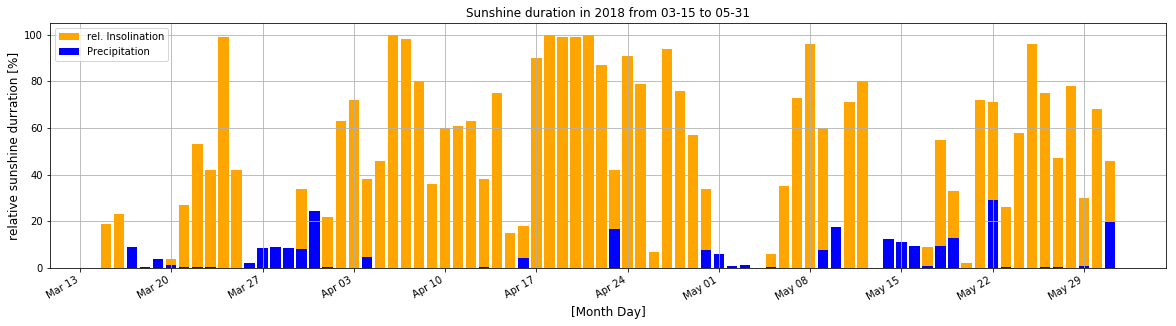

In [7]:
year  = '2018-'   
s_day = '03-15' # beginning of observation
e_day = '05-31' # end of observation
start = year + s_day
end   = year + e_day

s_precip_4 = s_precip.loc[start:end]
s_rel_4 = s_rel_insol.loc[start:end]

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(s_rel_4.index, s_rel_4.values, label='rel. Insolination', color= 'orange')
ax.bar(s_precip_4.index, s_precip_4.values, label='Precipitation', color= 'blue')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('relative sunshine durration [%]', fontsize=12)
ax.set_title('Sunshine duration in {} from {} to {}'.format(year.strip('-'),s_day,e_day))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

#### Detail view 2018 Jun to July

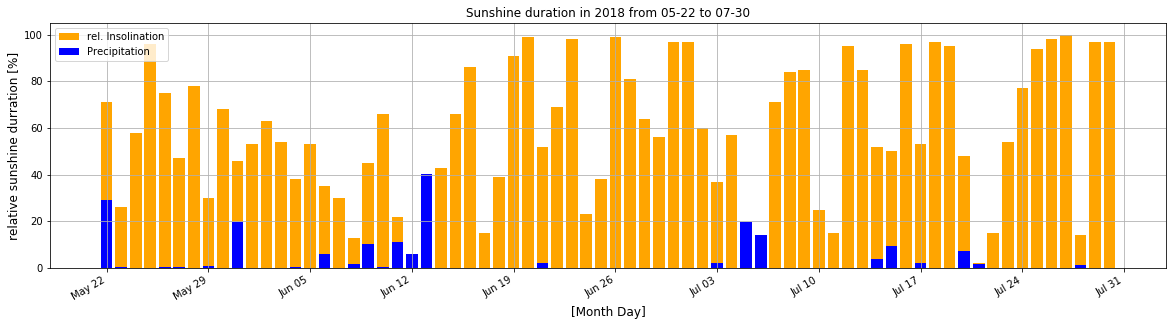

In [8]:
year  = '2018-'   
s_day = '05-22' # beginning of observation
e_day = '07-30' # end of observation
start = year + s_day
end   = year + e_day

s_precip_5 = s_precip.loc[start:end]
s_rel_5 = s_rel_insol.loc[start:end]

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(s_rel_5.index, s_rel_5.values, label='rel. Insolination', color= 'orange')
ax.bar(s_precip_5.index, s_precip_5.values, label='Precipitation', color= 'blue')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('relative sunshine durration [%]', fontsize=12)
ax.set_title('Sunshine duration in {} from {} to {}'.format(year.strip('-'),s_day,e_day))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

#### Detail view 2018 August to September

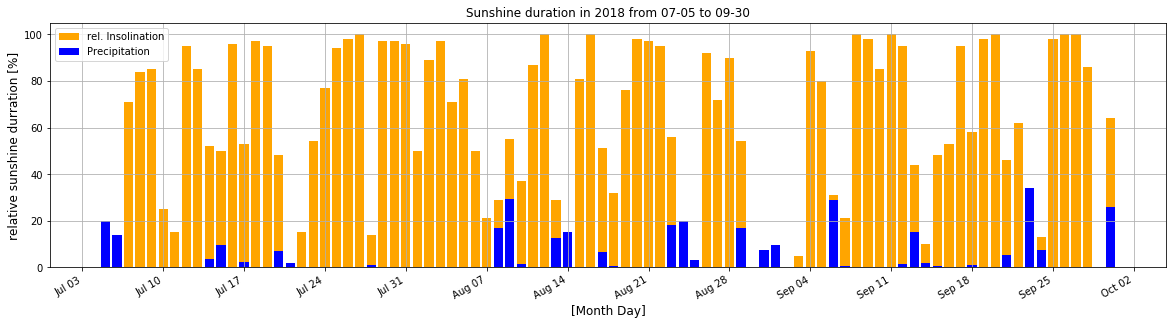

In [9]:
year  = '2018-'   
s_day = '07-05' # beginning of observation
e_day = '09-30' # end of observation
start = year + s_day
end   = year + e_day

s_precip_6 = s_precip.loc[start:end]
s_rel_6 = s_rel_insol.loc[start:end]

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(s_rel_6.index, s_rel_6.values, label='rel. Insolination', color= 'orange')
ax.bar(s_precip_6.index, s_precip_6.values, label='Precipitation', color= 'blue')

ax.set_xlabel('[Month Day]', fontsize=12)
ax.set_ylabel('relative sunshine durration [%]', fontsize=12)
ax.set_title('Sunshine duration in {} from {} to {}'.format(year.strip('-'),s_day,e_day))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()

#### Remarks: 
2018-10-19 : throughout a grey day<br>
2018-10-21 : throughout a grey day

### Longest dry periodes in 2018
21.06.2018 - 03.07.2018 -> 11 days<br>
28.07.2018 - 08.08.2018 -> 11 days<br>
10.02.2018 - 27.10.2018 -> 25 days<br>
